# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading our dataset

df = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
# Checking the shape of dataset

df.shape

(729322, 11)

In [4]:
# Looking at the descriptive statics of our dataset

df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [5]:
# shuffling the dataset and dividing it into train and test data

from sklearn.utils import shuffle
df = shuffle(df , random_state = 100)
div = int(df.shape[0]/4)
train = df.loc[:3*div+1,:]
test = df.loc[3*div+1:]

In [6]:
train.shape , test.shape

((556845, 11), (172478, 11))

# Simple Mean Model


In [7]:
test['Simple_mean'] = train['trip_duration'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
# taking mean of train['trip_duration'] and storing it in test data.

In [9]:
# importing mean squared error metric from skearn.metrics and evaluating our model

from sklearn.metrics import mean_squared_error as mse
error = np.sqrt(mse(test['trip_duration'] , test['Simple_mean']))
print('RMSE error for simple mean model is : ' , error)

RMSE error for simple mean model is :  5607.200024820171


In [10]:
# This error is way more than our calculated mean of trip_duration variable
# There must be a strong presence of outliers.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of variable trip duration')

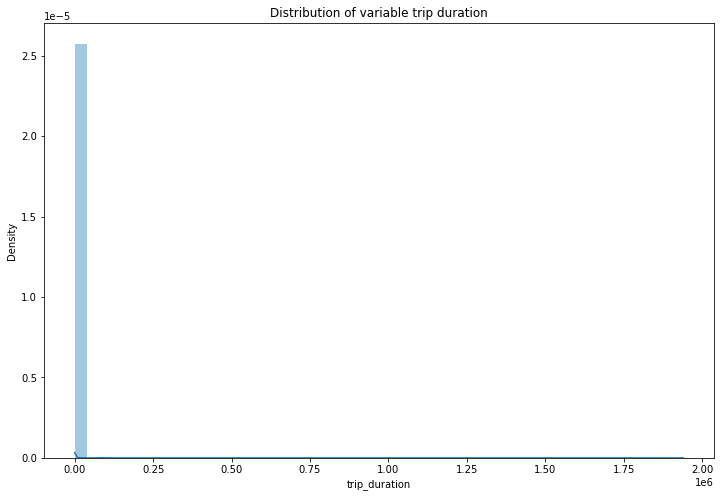

In [12]:
# Plotting a distribution of trip duration variable to see for outliers.
plt.figure(figsize = (12,8))
sns.distplot(df['trip_duration'])
plt.xlabel('trip_duration')
plt.title('Distribution of variable trip duration')

In [14]:
# Yes from the figure we can see that outliers are heavily present in our data.
# Lets try to improve our models predictions by addin a few other parameters.

# Adding vendor id parameter to the model and predicting

In [16]:
# Constructing a pivot table with index vendor id column

ven_id = pd.pivot_table(train , values = 'trip_duration' , index = ['vendor_id'] , aggfunc = np.mean)
ven_id

,trip_duration
vendor_id,
1,831.362741
2,1052.929632


In [17]:
test['ven_id_mean'] = 0
for i in train['vendor_id'].unique():
    test['ven_id_mean'][test['vendor_id'] == i] = train['trip_duration'][train['vendor_id'] == i].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [18]:
# calculating mean squared error from this data


In [20]:
vendor_id_error = np.sqrt(mse(test['trip_duration'] , test['ven_id_mean']))
print('Errors Caused by vendors :' , vendor_id_error)

Errors Caused by vendors : 5606.382348359158


In [21]:
# We've improved!!! Only a little though..let's improve it further.

# Adding Passanger Count parameter to the model


In [22]:
pass_count = pd.pivot_table(train , values = 'trip_duration' , index = ['passenger_count'] , aggfunc = np.mean)
pass_count

,trip_duration
passenger_count,
0,335.000000
1,919.339599
2,990.877145
3,1012.738985
4,1012.862887
5,1094.556880
6,1081.254653
9,560.000000


In [23]:
test['pass_count_mean'] = 0
for i in train['passenger_count'].unique():
    test['pass_count_mean'][test['passenger_count'] == i] = train['trip_duration'][train['passenger_count'] == i].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [24]:
pass_count_mean_error = np.sqrt(mse(test['trip_duration'] , test['pass_count_mean']))
print('Error due to number of passengers is :' , pass_count_mean_error)

Error due to number of passengers is : 5606.979112183749


In [25]:
# there is very slight variation in error.

In [26]:
# Let's Combine both the variables together and then find the mean error.

In [27]:
combined_table = pd.pivot_table(train , values = 'trip_duration' , index = ['vendor_id' , 'passenger_count'] , aggfunc = np.mean)
combined_table

trip_duration
vendor_id passenger_count               
1         0                   582.071429
          1                   808.097852
          2                   928.458349
          3                   929.575996
          4                   966.481172
          5                   899.968254
          6                  1119.693878
2         0                    20.545455
          1                  1045.992739
          2                  1039.564277
          3                  1063.865181
          4                  1046.822799
          5                  1095.381436
          6                  1081.151869
          9                   560.000000

In [28]:
# Calculating the super mean by using both the parameters as a constraint.

test['Super_mean'] = 0
s1 = 'vendor_id'
s2 = 'passenger_count'

for i in test[s1].unique():
    for j in test[s2].unique():
        test['Super_mean'][(test[s1] == i) & (test[s2] == j)] = train['trip_duration'][(train[s1] == i) & (train[s2] == j)].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [29]:
test[test['Super_mean'].isna() == True]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Simple_mean,ven_id_mean,pass_count_mean,Super_mean
149473,id3280610,2,2016-06-07 10:06:24,2016-06-07 10:06:43,7,-74.173668,40.737274,-74.17366,40.737297,N,19,949.959887,1052.929632,0.0,NaN


In [30]:
# We have a few of the values where the mean is absent. So we fill it with mean of super mean.

In [31]:
filler = test['Super_mean'].mean()

In [32]:
test['Super_mean'] = test['Super_mean'].fillna(filler)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
# Checking for the null values in the data

test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
Simple_mean           0
ven_id_mean           0
pass_count_mean       0
Super_mean            0
dtype: int64

In [34]:
error_related = np.sqrt(mse(test['trip_duration'] , test['Super_mean']))
print('Error in combined case :' , error_related)

Error in combined case : 5606.312138644955


In [35]:
# This is also in the same range as others.

Text(0.5, 1.0, 'Error Comparison')

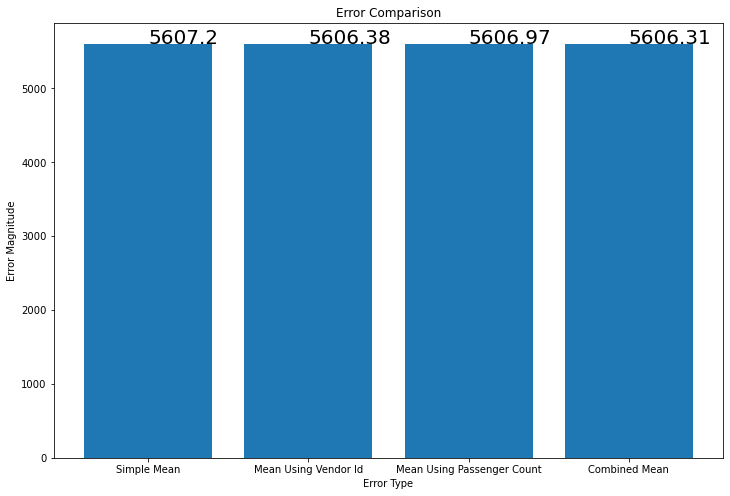

In [37]:
# Plotting all the errors on the bar plot.

plt.figure(figsize = (12,8))
X = ['Simple Mean' , 'Mean Using Vendor Id' , 'Mean Using Passenger Count' , 'Combined Mean']
Y = [5607.20 , 5606.38 , 5606.97 , 5606.31]
X_axis = np.arange(len(X))
plt.bar(X,Y)
for index , data in enumerate(Y):
    plt.text(x = index , y = data+1 , s = f'{data}' , fontdict = dict(fontsize = 20))

plt.xticks(X_axis , X)
plt.xlabel("Error Type")
plt.ylabel('Error Magnitude')
plt.title("Error Comparison")